# Nx versus T and OA

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

import numpy as np



In [4]:
plot_path = Path('Plots')

In [5]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}.png'
    return plot_path /f

In [6]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [7]:
import pandas as pd

In [8]:
from bs_fdbck.constants import measurements_path

In [9]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [10]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_2 = pd.read_excel(fn, sheet_name=2, header=2, usecols=range(6))

df_hyy_2.head()

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2 = df_hyy_2.set_index('date')

In [11]:
df_hyy_2

,year,month,day,T (degree C),AOD_340 nm,AOD_500 nm
date,,,,,,
2012-07-02,2012,7,2,16.753083,0.117652,0.065783
2012-07-03,2012,7,3,17.366916,0.148389,0.082933
2012-07-04,2012,7,4,18.099667,0.144905,0.078666
2012-07-06,2012,7,6,18.627832,0.173471,0.087554
2012-07-20,2012,7,20,13.770333,0.149718,0.090444
...,...,...,...,...,...,...
2018-08-08,2018,8,8,20.297500,0.084738,0.047252
2018-08-16,2018,8,16,17.330334,0.229233,0.149357
2018-08-19,2018,8,19,15.192917,0.088741,0.056444


In [12]:
df_hyy_1 = df_hyy_1.set_index('date')

In [13]:
df_hyy_1 = pd.merge(df_hyy_1,df_hyy_2[['AOD_340 nm','AOD_500 nm']], left_index=True, right_index=True,how="outer",)

In [14]:
df_hyy_1.index = df_hyy_1.index.rename('time')

In [15]:
df_hyy_1.head()

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3),AOD_340 nm,AOD_500 nm
time,,,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471,NaN,NaN
2012-07-02,2012,7,2,16.753084,1.697459,635.103339,0.117652,0.065783
2012-07-03,2012,7,3,17.366917,2.350536,745.212064,0.148389,0.082933
2012-07-04,2012,7,4,18.099667,2.118566,734.009356,0.144905,0.078666
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450,NaN,NaN


In [16]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:213: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:216: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [17]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [18]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')



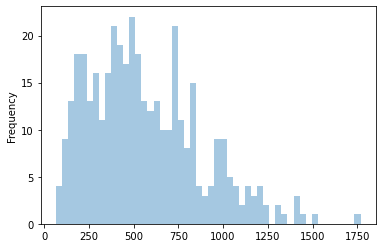

In [19]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

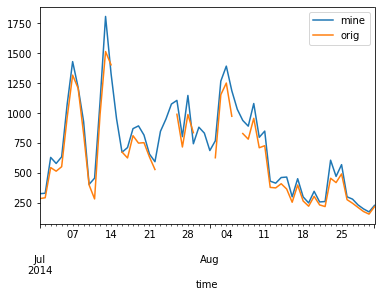

1.13207410632531


In [20]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

## Settings:

In [21]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [22]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [23]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [24]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### LOAD ECHAM SALSA

In [25]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
from_time = '2012-01'
to_time = '2012-02'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'



## Settings:

In [26]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [27]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]

In [28]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-06-12 18:29:25,423 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-06-12 18:29:25,423 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


## Variables

In [29]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
      
      
      ] 

In [30]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [31]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-06-12 18:29:25,601 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [32]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [33]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [34]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [35]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [36]:
cases_noresm1 = ['OsloAero_intBVOC_f19_f19_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f19_f19_mg17_ssp245']

In [37]:
case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f19_f19_mg17_fssp'

## Variables

In [38]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [39]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [40]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [41]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-06-12 18:29:27,962 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [42]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-06-12 18:29:29,020 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [43]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [44]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [45]:
case_mod

'OsloAero_intBVOC_f19_f19_mg17_fssp'

In [46]:
dic_ds = {case_mod: ds_comb}

In [47]:
dic_mod_ca['NorESM'] = dic_ds.copy()

## SELECT STATION:


In [48]:
for mod in dic_mod_ca.keys():
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station='SMR')
        dic_mod_ca[mod][ca].load()

# Functions:

In [49]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

## ADJUST ECHAM

In [50]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [51]:
model_lev_i=-1

In [52]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

In [54]:
standard_air_density = 100*pressure/(R*temperature)

In [55]:
def ds2df_echam(ds_st, model_lev_i=-1):
    
    

    # N50, N100 etc:
    nvars = ['mmrtrN3','mmrtrN50','mmrtrN100','mmrtrN200','mmrtrN250','mmrtrN500']
    for v in nvars:
        if v in ds_st:
            if ds_st[v].attrs['units']=='kg-1':
                v_new = v[5:]
                print(v_new)
                # /kg_air --> /m3_air by multiplying by density kg_air/m3_air
                # then from /m3-->/cm3: multiply by 1e-6
                ds_st[v_new] = ds_st[v]*standard_air_density*1e-6
                ds_st[v_new].attrs['units'] = 'm-3'
                long_name = ds_st[v].attrs['long_name'] 
                ds_st[v_new].attrs['long_name'] = 'number concentration ' + long_name.split('_')[-1]
                ds_st[v_new].attrs['description'] = 'number concentration ' + long_name.split('_')[-1]
                
    vars_kg2kg = ['ORG_mass', ]
    
    for v in vars_kg2kg:
        
        if v in ds_st:
            if ds_st[v].attrs['units']=='kg kg-1':
                v_new = v + '_conc'
                # kg_aero/kg_air --> kg_m3: multiply by density kg_air/m3_air
                # kg_aero/m3_air --> ug/m3_air: multiply by 
                ds_st[v_new] = ds_st[v]*standard_air_density*1e9
                
                ds_st[v_new].attrs['units'] = 'kg/m-3'
                long_name = ds_st[v].attrs['long_name'] 
                ds_st[v_new].attrs['long_name'] = 'number concentration ' + long_name.split('_')[-1]
                ds_st[v_new].attrs['description'] = 'number concentration ' + long_name.split('_')[-1]

    
    rn_sub ={k:rn_dict_echam[k] for k in rn_dict_echam if ((k in ds_st.data_vars) & (rn_dict_echam[k] not in ds_st.data_vars))}
    ds_st = ds_st.rename(rn_sub)
    ds_st_ilev = ds_st.isel(lev = model_lev_i)
    
    if 'T' in ds_st_ilev:
        ds_st_ilev['T_C'] = ds_st_ilev['T']- 273.15



    df = calculate_daily_median_summer(ds_st_ilev)
    df_sm = calculate_summer_median(df)
    
    
    return df, df_sm

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam])

N3
N50
N100
N200
N250
N500


In [56]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

### NorESM

In [57]:


dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], model_lev_i=-1, return_summer_median=True)


dic_df_mod_case['NorESM'] = dic_df.copy()
dic_dfsm_mod_case['NorESM'] = dic_df_sm.copy()

hey
<xarray.Dataset>
Dimensions:   (time: 61345, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC     (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI     (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX     (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N      (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...        ...
    SOA_LV    (time, lev) float32 1.125e-28 3.214e-28 ... 8.897e-14 1.184e-13
    SOA_NA    (time, lev) float32 1.169e-13 7.966e-14 ... 5.147e-13 6.991e-13
    SS_A1     (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2     (tim

## Merge with observations:

In [58]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [59]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_hyy_1, right_on='time', left_on='time')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM


In [60]:
dic_df_mod_case[mod][ca]#['year']

,ACTREL,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,COAGNUCL,DOD440,DOD500,...,year_x,year_y,month_y,day,T (degree C),OA (microgram m^-3),N100 (cm^-3),AOD_340 nm,AOD_500 nm,year
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01,0.058056,6.372076e-11,1.509822e-12,7.925721e-12,8.556307e-13,4.780953e-12,9.336510e-16,0.000007,0.097085,0.087755,...,2012,2012,7,1,17.308417,3.014541,781.245471,NaN,NaN,2012
2012-07-02,0.000000,3.937535e-11,1.405520e-12,5.104366e-12,8.653775e-13,4.576645e-12,1.110898e-15,0.000005,0.054236,0.048425,...,2012,2012,7,2,16.753084,1.697459,635.103339,0.117652,0.065783,2012
2012-07-03,0.000000,2.880795e-11,6.125397e-13,3.390111e-12,5.108657e-13,2.512098e-12,2.008015e-17,0.000005,0.040097,0.035167,...,2012,2012,7,3,17.366917,2.350536,745.212064,0.148389,0.082933,2012
2012-07-04,0.000000,2.175049e-11,1.096714e-13,2.741875e-12,2.981834e-13,1.292718e-12,3.413075e-18,0.000007,0.035297,0.029562,...,2012,2012,7,4,18.099667,2.118566,734.009356,0.144905,0.078666,2012
2012-07-05,0.547508,3.648234e-11,1.749350e-13,4.401795e-12,3.922025e-13,1.836363e-12,9.174700e-17,0.000009,0.086474,0.071954,...,2012,2012,7,5,19.267666,3.413631,1019.238450,NaN,NaN,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,0.000000,3.023769e-11,1.941080e-13,4.090374e-12,1.038575e-12,5.990693e-12,4.672964e-14,0.000004,0.027635,0.023929,...,2018,2018,8,27,12.378417,1.065071,423.684130,NaN,NaN,2018
2018-08-28,3.200871,6.835180e-11,3.693192e-13,8.666998e-12,1.778462e-12,1.189553e-11,5.022249e-14,0.000006,0.048848,0.042065,...,2018,2018,8,28,13.056500,1.517197,513.888488,NaN,NaN,2018
2018-08-29,0.000000,3.505173e-11,3.651701e-13,5.499686e-12,6.762774e-13,4.478496e-12,6.306904e-14,0.000006,0.034157,0.028256,...,2018,2018,8,29,15.028000,2.148551,720.768715,0.211001,0.150221,2018


In [61]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'OA (microgram m^-3)','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_joint_hyy = add_log(df_joint_hyy)

{'OA (microgram m^-3)', 'N100', 'N200', 'N100 (cm^-3)', 'N50', 'OA'}
{'N100', 'OA', 'N200', 'N50'}
{'N150', 'OA (microgram m^-3)', 'N100', 'N200', 'N100 (cm^-3)', 'N50', 'OA'}
{'N150', 'N100', 'N200', 'N50', 'OA'}
{'N150', 'OA (microgram m^-3)', 'N100', 'N200', 'N100 (cm^-3)', 'N50'}


In [62]:
ca = case_mod

In [63]:
mask_obs_N = dic_df_mod_case[mod][ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['OA (microgram m^-3)'].notnull()

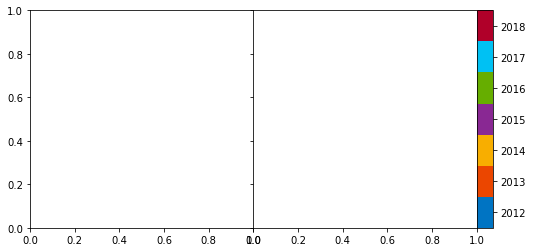

In [64]:
fig, axs, cax = make_cool_grid()

# Plots

In [65]:
def fix_ax_labs(axs, x=True, y=True):
    if len(axs.shape)==1:
        _axs = np.expand_dims(axs, axis=0)
    else:
        _axs = axs
        
    
    #print(axs)
    if x:
        for ax in _axs[-1,:]:
            
            print(ax)
            x_ticks_new = ax.get_xticklabels()#[1:-1]
            t = x_ticks_new[-1]
            nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])
            x_ticks_new[-1] = nt
            ax.set_xticklabels(x_ticks_new)
    if y:
        for ax in _axs[:,0]:
            #t = ax.get_xticklabels()[0]
            #nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])
            y_ticks_new = ax.get_yticklabels()#[1:-1]
            #x_ticks_new[0] = nt
            t = y_ticks_new[-1]
            nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])
            y_ticks_new[-1] = nt
            ax.set_yticklabels(y_ticks_new)
    return
        #    x_ticks_new = ax.get_xticklabels()[1:-1]
#    ax.set_xticklabels(x_ticks_new)

#fix_ax_labs(axs, y=False)

## AOT:

In [66]:
df_joint_hyy

,N50,N80,N100,N150,N200,N250,N300,JA,season,year,...,OA (microgram m^-3),N100 (cm^-3),AOD_340 nm,AOD_500 nm,log10(N150),log10(OA (microgram m^-3)),log10(N100),log10(N200),log10(N100 (cm^-3)),log10(N50)
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01,1492.096227,1124.137898,878.460678,462.641641,200.924829,83.479780,33.967185,True,JJA,2012,...,3.014541,781.245471,NaN,NaN,2.665245,0.479221,2.943722,2.303034,2.892788,3.173797
2012-07-02,1688.200990,1025.629569,705.072878,297.947084,119.491566,43.818461,14.495499,True,JJA,2012,...,1.697459,635.103339,0.117652,0.065783,2.474139,0.229799,2.848234,2.077337,2.802844,3.227424
2012-07-03,1831.094763,1210.790719,831.524096,282.305893,135.282925,62.360946,24.199502,True,JJA,2012,...,2.350536,745.212064,0.148389,0.082933,2.450720,0.371167,2.919875,2.131243,2.872280,3.262711
2012-07-04,1775.317472,1140.175300,839.073401,299.732075,106.271887,37.873719,13.743566,True,JJA,2012,...,2.118566,734.009356,0.144905,0.078666,2.476733,0.326042,2.923800,2.026418,2.865702,3.249276
2012-07-05,1882.260561,1396.069416,1171.607041,500.573868,161.543271,51.515628,17.668845,True,JJA,2012,...,3.413631,1019.238450,NaN,NaN,2.699468,0.533217,3.068782,2.208289,3.008276,3.274680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,1280.336343,705.205867,454.159344,139.446334,47.798069,18.624596,8.022841,True,JJA,2018,...,1.065071,423.684130,NaN,NaN,2.144407,0.027378,2.657208,1.679410,2.627042,3.107324
2018-08-28,2039.979825,1212.486165,812.385444,285.173046,100.853414,36.526093,14.386055,True,JJA,2018,...,1.517197,513.888488,NaN,NaN,2.455108,0.181042,2.909762,2.003691,2.710869,3.309626
2018-08-29,1681.779709,1160.036276,811.685256,304.891323,99.495125,33.218052,12.563429,True,JJA,2018,...,2.148551,720.768715,0.211001,0.150221,2.484145,0.332146,2.909388,1.997802,2.857796,3.225769


In [67]:
obs_mask.index

NameError: name 'obs_mask' is not defined

In [ ]:
df_s

In [ ]:
df_s.loc['2012-07-20']

In [ ]:
#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)


xlims = [5,30]
ylims = [0,0.5]
xlab = r'T  [$^\circ$C]'

ylab = r'AOT'


# OBS: 
ax = axs[2]
v_y = 'AOD_500 nm'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
print(ax.get_xticklabels())

ax.set_title('Observations')
obs_mask = df_s[[v_x,v_y]].dropna()




v_x = 'T_C'
v_y = 'DOD500'


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca].loc['2012':]


df_s = df_s.loc[obs_mask.index]
fig, ax = plot_scatter(v_x,v_y, df_s, None, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title(mod)


# ECHAM:
mod = 'ECHAM-SALSA'
v_y = 'aot550nm'

ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca].loc['2012':]

df_s = df_s.loc[obs_mask.index]

fig, ax = plot_scatter(v_x,v_y, df_s, None, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_y = 'AOD_500 nm'
v_x = 'T (degree C)'

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.show()
#fix_ax_labs(axs, y=False)
#fix_ax_labs(axs, y=False)

#fig.savefig(fn, dpi=150)

In [ ]:
#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

xlab = r'OA [$\mu m^{-3}$]'

ylab = r'AOT 500'

#xlims = [5,30]
xlims = [0,12]

ylims = [0,0.5]


# OBS: 
ax = axs[2]
v_y = 'AOD_500 nm'
#v_x = 'T (degree C)'
v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
print(ax.get_xticklabels())

ax.set_title('Observations')
obs_mask = df_s[[v_x,v_y]].dropna()



v_x = 'OA'
v_y = 'DOD500'


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca].loc['2012':]
df_s = df_s.loc[obs_mask.index]

df_sy = None#dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title(mod)


# ECHAM:
mod = 'ECHAM-SALSA'
v_y = 'aot550nm'

ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]
df_s = df_s.loc[obs_mask.index]

df_sy =  None


fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title( mod)



fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.show()
#fix_ax_labs(axs, y=False)
#fix_ax_labs(axs, y=False)

#fig.savefig(fn, dpi=150)

## OA:

## N50

In [ ]:
#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'
v_y = 'log10(OA)'

xlab = r'T  [$^\circ$C]'

ylab = r'log10(OA) [$\mu m^{-3}$]'

xlims = [5,30]
ylims = [-1,1.5]

# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title(mod)


# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_y = 'log10(OA (microgram m^-3))'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
print(ax.get_xticklabels())

ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.show()
#fix_ax_labs(axs, y=False)
#fix_ax_labs(axs, y=False)

#fig.savefig(fn, dpi=150)

In [ ]:
fix_ax_labs(axs, y=False)

fig.savefig(fn, dpi=150)
fig

In [ ]:
axs[0].get_xticklabels()

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'OA'
xlab = r'T  [$^\circ$C]'

ylab = r'OA [$\mu m^{-3}$]'

xlims = [5,30]

ylims = [0,12]

# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

In [ ]:
fix_ax_labs(axs, y=False)

fig.savefig(fn, dpi=150)
fig

## N50

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'
v_y = 'N50'

xlab = 'OA  [$\mu m^{-3}$]'
ylab = r'N$_{50}$ [cm$^{-3}$]'


xlims = [0,12]

ylims = [0,5000]

# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'N50'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{50}$ [cm$^{-3}$]'


xlims = [5,30]

ylims = [0,5000]


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## Log scale

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'log10(N50)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{50}$ [cm$^{-3}$]'


xlims = [5,30]

ylims = [2.25,4]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'log10(N$_{50}$ [cm$^{-3}$])'


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## N100

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'
v_y = 'N100'

xlab = 'OA  [$\mu m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'


xlims = [0,12]

ylims =None# [0,5000]

# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'N100'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{100}$ [cm$^{-3}$]'


xlims = [5,30]

ylims = None#[0,5000]


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'
v_y = 'N50'

xlab = 'OA  [$\mu m^{-3}$]'
ylab = r'N$_{50}$ [cm$^{-3}$]'


xlims = [0,12]

ylims = [0,5000]

# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'N50'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{50}$ [cm$^{-3}$]'


xlims = [5,30]

ylims = [0,5000]


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## Log scale

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'log10(N100)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{100}$ [cm$^{-3}$]'


xlims = [5,30]

ylims = None#[2.25,4]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'log10(N$_{100}$ [cm$^{-3}$])'


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## N200

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'
v_y = 'N200'

xlab = 'OA  [$\mu m^{-3}$]'
ylab = r'N$_{200}$ [cm$^{-3}$]'


xlims = [0,12]

ylims = [0,700]

# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'N200'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{200}$ [cm$^{-3}$]'


xlims = [5,30]

ylims = [0,700]


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## Log scale

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'log10(N200)'

xlims = [5,30]

ylims = [0.5,3]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'log10(N$_{200}$ [cm$^{-3}$])'


# NORESM: 
ax = axs[0]
mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
ax.set_title(mod)

# ECHAM:
mod = 'ECHAM-SALSA'
ca = case_name_echam
ax = axs[1]

df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title( mod)


# OBS: 
ax = axs[2]
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False, 
                      legend_loc= 4)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## The end


In [ ]:
import seaborn as sns

In [ ]:
v_x = 'N50'
v_y = 'N200'

mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]


f, axs = plt.subplots(1,3, figsize=[15,5])
ax = axs[0]

sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_s,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title(f'MODEL: {mod}')

mod = 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]
ax = axs[1]
sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_s,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title(f'MODEL: {mod}')


ax = axs[2]
sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_joint_hyy,
    hue='OA (microgram m^-3)',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title('OBSERVATIONS')

#print(len(df[~df['OA_mid_range']]))

In [ ]:
v_x = 'N100'
v_y = 'N200'


mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]


f, axs = plt.subplots(1,3, figsize=[15,5])
ax = axs[0]

sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_s,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title(f'MODEL: {mod}')

mod = 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]
ax = axs[1]
sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_s,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title(f'MODEL: {mod}')


ax = axs[2]
sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_joint_hyy,
    hue='OA (microgram m^-3)',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title('OBSERVATIONS')

#print(len(df[~df['OA_mid_range']]))

In [ ]:
v_x = 'N50'
v_y = 'N100'

mod = 'NorESM'
ca = case_noresm
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]


f, axs = plt.subplots(1,3, figsize=[15,5])
ax = axs[0]

sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_s,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title(f'MODEL: {mod}')

mod = 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]
ax = axs[1]
sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_s,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title(f'MODEL: {mod}')


ax = axs[2]
sns.scatterplot(
    x=v_x,
    y=v_y,
    data=df_joint_hyy,
    hue='OA (microgram m^-3)',
    ax = ax,
    #palette=palette_OA,
)
ax.set_title('OBSERVATIONS')

#print(len(df[~df['OA_mid_range']]))

## ALL

In [ ]:
axs[0]

In [ ]:
ylim_dic=dict(
    N50=[0,6000],
    N100 = [0,2600],
    N200 = [0,600],
    
)

In [ ]:
def fix_ax_labs(axs):
    for ax in axs[:,0].flatten():
        #t = ax.get_yticklabels()[0]
        #nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])
        x_ticks_new = ax.get_yticklabels()#[1:-1]
        #x_ticks_new[0] = nt
        t = ax.get_yticklabels()[-1]
        nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])
        x_ticks_new[-1] = nt
        ax.set_yticklabels(x_ticks_new)
    for ax in axs[-1,:].flatten():
        t = ax.get_xticklabels()[0]
        nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])
        x_ticks_new = ax.get_xticklabels()#[1:-1]
        x_ticks_new[0] = nt
        t = ax.get_xticklabels()[-1]
        nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])
        x_ticks_new[-1] = nt
        ax.set_xticklabels(x_ticks_new)



In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid(ncols=3, nrows = 3, )#w_plot=3.5)

fontsize= 15

v_x = 'OA'
v_y = 'N200'

xlab = 'OA  [$\mu m^{-3}$]'
ylab = r'N$_{200}$ [cm$^{-3}$]'


xlims = [0,12]

ylims = None

# NORESM: 
for i, v_y in enumerate(['N50','N100','N200']):
    v_x = 'OA'
    ylims=ylim_dic[v_y]
    nu = v_y[1:]
    ylab = r'N$_{%s}$ [cm$^{-3}$]'%nu

    ax = axs[i, 0 ]
    mod = 'NorESM'
    ca = case_noresm
    df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

    df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

    fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                           ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
    ax.set_title(mod, fontsize=fontsize)

    # ECHAM:
    mod = 'ECHAM-SALSA'
    ca = case_name_echam
    ax = axs[i,1]

    df_s = dic_df_mod_case[mod][ca][mask_obs_OA].loc['2012':]

    df_sy = dic_dfsm_mod_case[mod][ca].loc['2012':]

    fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = ax,
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
    #ax.hlines(2000, 5,30, color='k', linewidth=1)
    
    ax.set_title( mod, fontsize=fontsize)


    # OBS: 
    ax = axs[i,2]
    v_x = 'OA (microgram m^-3)'

    ca ='OBS'
    df_s = df_joint_hyy#.loc['2012':'2014']

    df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
    #xlims = [5,30]
    #ylims = [0,2000]
    fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                       ax = ax,
                      add_cbar=False)
    ax.set_title('Observations', fontsize=fontsize)

for ax in axs.flatten():
    xlab = ax.get_xlabel()
    ax.set_xlabel(xlab, fontsize=fontsize)
    ylab = ax.get_ylabel()
    ax.set_ylabel(ylab, fontsize=fontsize)
for ax in axs[1:,:].flatten():
    ax.set_title('')
fn = make_fn_scat(f'obs_{case_noresm}_{case_name_echam}_all', v_x, v_y)
#fix_ax_labs(axs)

#fix_ax_labs(axs)

fig.savefig(fn, dpi=150)


plt.show()

In [ ]:
fix_ax_labs(axs)
fig
fig.savefig(fn, dpi=150)
fig

In [ ]:
import matplotlib.text

In [ ]:
nt = matplotlib.text.Text(t.get_position()[0],t.get_position()[1])#.set_label('')

In [ ]:
ax = axs[0,0]
ax.get_yticklabels()